**SHETH L.U.J & SIR M.V COLLEGE**

DATA SCIENCE

T094 : Shubhangi Mane

 AIM : Logistic Regression and Decision Tree

 Build a logistic regression model to predict a binary outcome.

 Evaluate the model's performance using classification metrics (e.g., accuracy,
precision, recall).

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [ ]:
# Load dataset
path = "women_clothing_ecommerce_sales.csv"
df = pd.read_csv(path)

# Create binary target: high revenue orders
df['high_revenue'] = (df['revenue'] >= df['revenue'].median()).astype(int)
target = 'high_revenue'

# Select features (excluding revenue and SKU to avoid leakage)
features = [c for c in ['unit_price','quantity','color','size'] if c in df.columns]
print("Features used:", features)
df.head()


Features used: ['unit_price', 'quantity', 'color', 'size']


,order_id,order_date,sku,color,size,unit_price,quantity,revenue,high_revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298,1
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258,0
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228,0
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264,0
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264,0


Encode Categorical Features and Scale Numeric Features

In [ ]:
X = df[features].copy()
y = df[target].copy()

# Encode categorical features
le = LabelEncoder()
for col in X.select_dtypes(include=['object','category']).columns:
    X[col] = X[col].fillna("MISSING")
    X[col] = le.fit_transform(X[col].astype(str))

# Standardize numeric features
scaler = StandardScaler()
X_scaled = X.copy()
for col in X.select_dtypes(include=[int, float]).columns:
    X_scaled[col] = scaler.fit_transform(X[[col]])


Split Dataset

In [ ]:
# Split dataset (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=0, stratify=y)


Train Logistic Regression Model

In [ ]:
# Train logistic regression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]

print("Predicted Test Results:", y_pred)


Predicted Test Results: [1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1]


Confusion Matrix

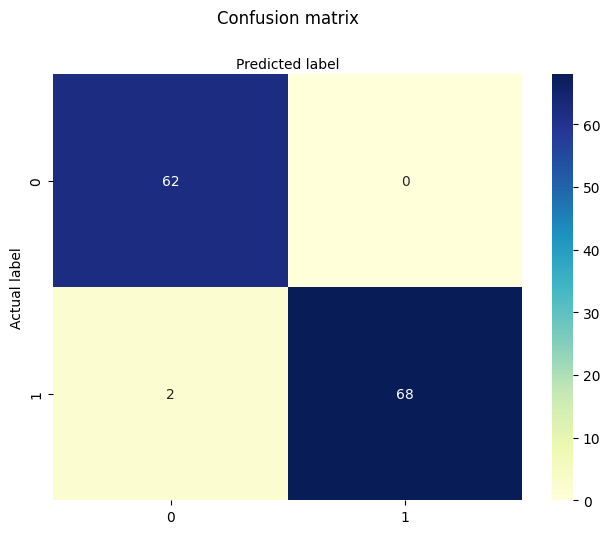

In [ ]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=['Low Revenue','High Revenue']

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


Evaluation Metrics

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


Accuracy: 0.9848484848484849
Precision: 1.0
Recall: 0.9714285714285714


ROC Curve and AUC

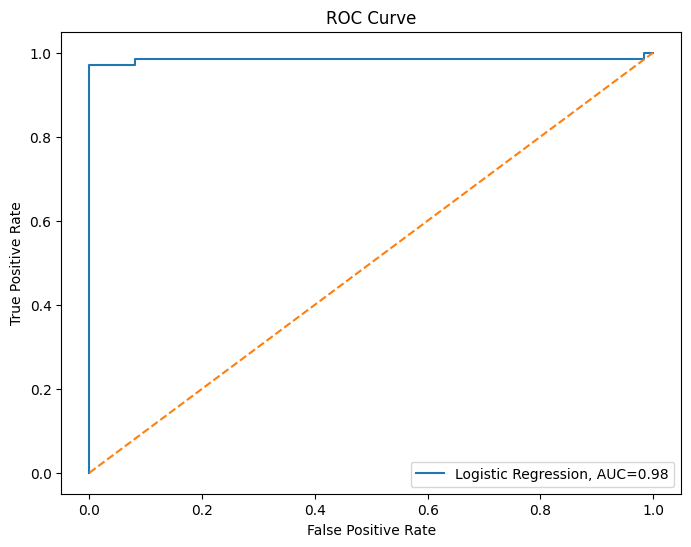

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="Logistic Regression, AUC="+str(round(roc_auc,2)))
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)




Feature Coefficients

In [ ]:
# Show coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients


,Feature,Coefficient
0,unit_price,7.712223
2,color,0.183893
1,quantity,0.145539
3,size,-0.222699


Visualize Coefficients

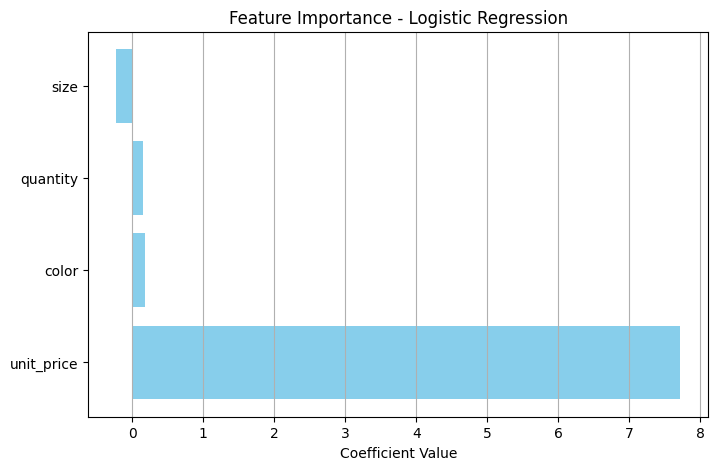

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance - Logistic Regression')
plt.grid(axis='x')
plt.show()
